# **Classification**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
type(mnist)

sklearn.utils._bunch.Bunch

In [3]:
X,y = mnist['data'],mnist['target']

X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

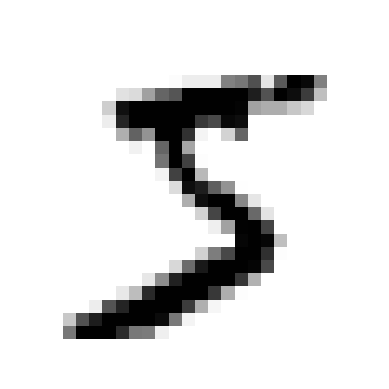

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.loc[0]
some_digit_image =some_digit.to_numpy().reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation ='nearest')
plt.axis('off')
plt.show()

In [6]:
import numpy as np
y = y.astype(np.uint8)
y.loc[0]

5

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## **Training a Binary Classifier**

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
some_digit = X.loc[0]

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Measuring Accuracy using Cross validation

In [10]:
from sklearn.model_selection import cross_val_score

crves = cross_val_score(sgd_clf,X_train,y_train_5,scoring='accuracy',cv=3)
crves

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.base import BaseEstimator

class Never5Classifer(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

never_5_clf = Never5Classifer()

cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [15]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [16]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [17]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshhold = 0
y_some_digit_pred = (y_scores>threshhold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [18]:
threshhold=8000
y_some_digit_pred = (y_scores>threshhold)

print(y_some_digit_pred)

[False]


In [19]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [20]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

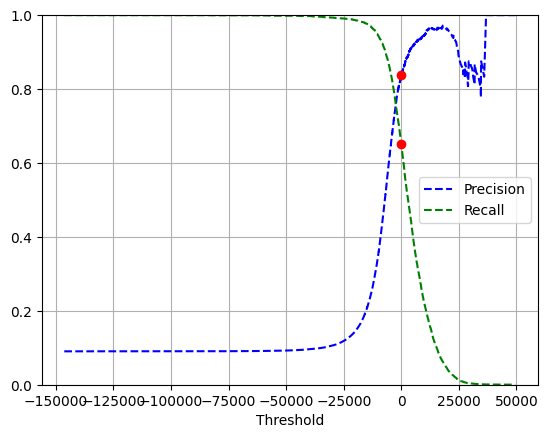

In [21]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
  plt.plot(thresholds,recalls[:-1],'g--',label='Recall')
  plt.xlabel("Threshold")
  plt.legend(loc="center right")
  plt.ylim([0, 1])
  plt.grid(True)
  # Highlight the threshold
  threshold = 0.5
  threshold_index = np.argmax(thresholds >= threshold)
  plt.plot(thresholds[threshold_index], precisions[threshold_index - 1], 'ro')
  plt.plot(thresholds[threshold_index], recalls[threshold_index - 1], 'ro')

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

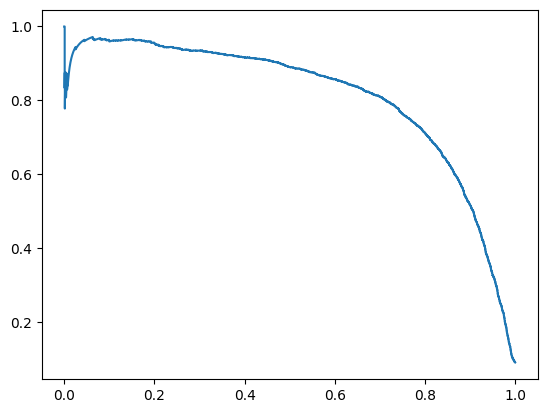

In [23]:
plt.plot(recalls,precisions)

## ROC Curve

In [24]:
from sklearn.metrics import roc_curve

In [25]:
fpr,tpr, threshholds = roc_curve(y_train_5,y_scores)

In [28]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.grid(visible=True)

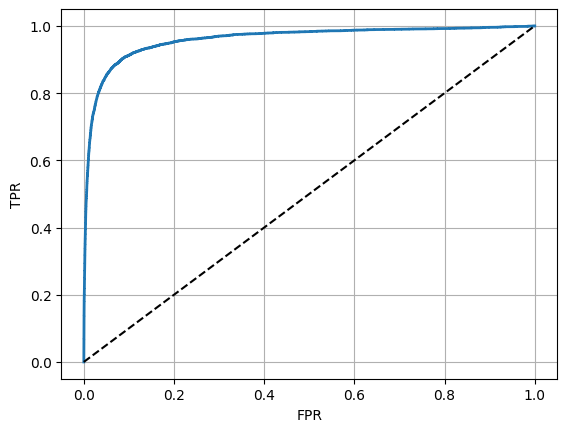

In [29]:
plot_roc_curve(fpr,tpr,'ROC curve')

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rfc,X_train,y_train_5,cv=3,method='predict_proba')
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

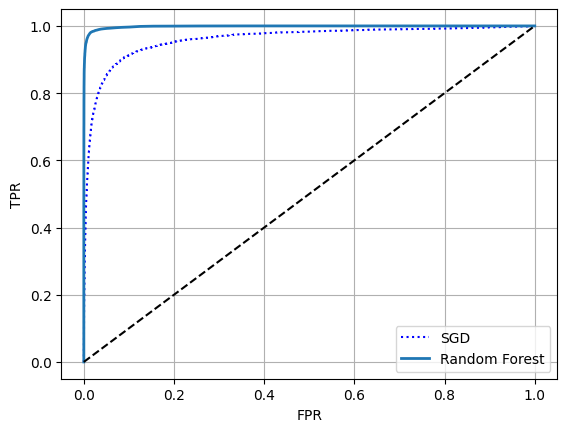

In [33]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')

In [34]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [37]:
rfc.fit(X_train,y_train_5)


In [41]:
y_pred = rfc.predict(X_test)

In [ ]:
y_test

In [43]:
print(f'Precision Scores: {precision_score(y_test_5,y_pred)}')
print(f'Recall Score: {recall_score(y_test_5,y_pred)}')

Precision Scores: 0.993581514762516
Recall Score: 0.8677130044843049


In [44]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [45]:
[some_digit]

[pixel1      0.0
 pixel2      0.0
 pixel3      0.0
 pixel4      0.0
 pixel5      0.0
            ... 
 pixel780    0.0
 pixel781    0.0
 pixel782    0.0
 pixel783    0.0
 pixel784    0.0
 Name: 0, Length: 784, dtype: float64]

In [46]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [47]:
np.argmax(some_digit_scores)

3

In [49]:
y.loc[0]

5

In [51]:
sgd_clf.classes_[3]

3

In [52]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train,y_train)

ovo_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [53]:
rfc.fit(X_train,y_train)
rfc.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [54]:
rfc.predict_proba([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [56]:
cross_val_score(sgd_clf,X_train,y_train,cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

y_train_score = cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')
y_train_score

array([0.8983, 0.891 , 0.9018])

In [60]:
y_train_pred= cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

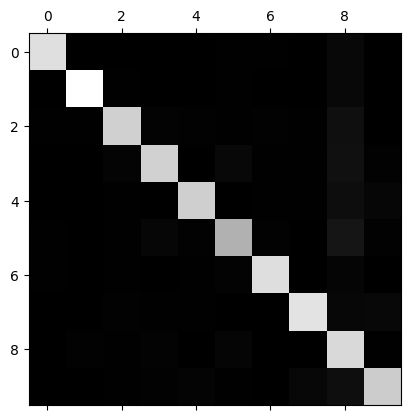

In [61]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

## Error Analysis
- lets assume you have a promising model after doing all the necessary steps of testing, evaluating all the models and finetunig their hyperparameters.
- No you need to improve your model
* One of the ways to do it is via analyze the type of errors it makes.